In [1]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5;pip install -qr requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 14335, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 14335 (delta 45), reused 46 (delta 19), pack-reused 14242
Receiving objects: 100% (14335/14335), 13.68 MiB | 23.94 MiB/s, done.
Resolving deltas: 100% (9845/9845), done.
     |████████████████████████████████| 182 kB 12.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 1.6 MB 66.8 MB/s 


In [2]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [3]:
!nvidia-smi

Tue Dec  6 09:53:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    30W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!ls -l /content/drive/MyDrive/ColabNotebooks/hs0224/

total 53709
-rw------- 1 root root 52084441 Dec  6 09:52  dataset.zip
-rw------- 1 root root   431565 Dec  5 14:35  mnist_과제.ipynb
-rw------- 1 root root    60246 Dec  5 15:15  MNIST_Practice.ipynb
-rw------- 1 root root  1288485 Dec  4 05:18 'opencv_faster_rcnn(image).ipynb'
-rw------- 1 root root    38878 Dec  5 03:05  Untitled0.ipynb
-rw------- 1 root root    48616 Dec  6 06:35  yolov5s_fall_detection_train.ipynb
-rw------- 1 root root   982417 Dec  5 06:47  yolov5s_inference.ipynb
-rw------- 1 root root    56718 Dec  6 09:14  yolov5s_train_coco.ipynb
-rw------- 1 root root     5465 Dec  5 09:33  yolov5s_train_oxpet.ipynb


In [5]:
!unzip -qq /content/drive/MyDrive/ColabNotebooks/hs0224/dataset.zip

In [6]:

!cd yolov5;python train.py --img 640 --batch 32 --epochs 20 --data /content/dataset/data.yaml --weights yolov5s.pt --nosave --cache

train: weights=yolov5s.pt, cfg=, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=32, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7,

In [7]:
!wget -O /content/dataset/fall_test.jpg https://github.com/hs0224/Capstone-Design/blob/main/DL/images/fall_test2.jpg?raw=true

--2022-12-06 10:09:12--  https://github.com/hs0224/Capstone-Design/blob/main/DL/images/fall_test2.jpg?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hs0224/Capstone-Design/raw/main/DL/images/fall_test2.jpg [following]
--2022-12-06 10:09:12--  https://github.com/hs0224/Capstone-Design/raw/main/DL/images/fall_test2.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hs0224/Capstone-Design/main/DL/images/fall_test2.jpg [following]
--2022-12-06 10:09:12--  https://raw.githubusercontent.com/hs0224/Capstone-Design/main/DL/images/fall_test2.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [8]:
# --source : 현재 이미지가 있는 경로

# 실행 디렉토리를 고정하고, 시각화시 bounding box line 두께를 조절. 

!cd yolov5;python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.3 --source /content/dataset/fall_test.jpg  \
                            --project /content/dataset  --name=result --exist-ok --line-thickness 2

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/dataset/fall_test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/dataset, name=result, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/fall_test.jpg: 448x640 1 fall, 13.4ms
Speed: 0.5ms pre-process, 13.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/dataset/result


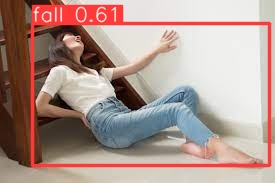

In [9]:
Image(filename='/content/dataset/result/fall_test.jpg', width=600)

- 데이터 수집도 더해야하고 아직 수정할 부분이 많다. 
지금까지 yolov5s를 활용해서 fall_detection를 간단히 수행해보았다.